<a href="https://colab.research.google.com/github/Shibhaditya2/Spoon-Knife/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [111]:
# Load the dataset
data = pd.read_csv('Frogs_MFCCs.csv')

print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [112]:
# Step 1: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


### Missing Values Check
The dataset was analyzed for missing values across all features. No missing values were found in any of the columns, including the 22 MFCC coefficients (`MFCCs_1` to `MFCCs_22`), as well as the categorical columns (`Family`, `Genus`, `Species`, and `RecordID`). This indicates that the dataset is complete and no imputation is required.


In [113]:
# converting string values to numeric values
label_encoder = LabelEncoder()
data['Genus_numeric'] = label_encoder.fit_transform(data['Genus'])
data['Family_numeric'] = label_encoder.fit_transform(data['Family'])
data['Species_numeric'] = label_encoder.fit_transform(data['Species'])
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID,Genus_numeric,Family_numeric,Species_numeric
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1,0,3,0
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1,0,3,0
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1,0,3,0
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1,0,3,0
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1,0,3,0


In [114]:
# Feature distributions
print("\nStatistical summary of the dataset:")
print(data.describe())


Statistical summary of the dataset:
          MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.430695     0.559861     0.222592   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.097939    -0.001397    -0.000370     0.128213     0.055998  ...   
std       0.120412     0.171404     0.116302     0.179008  

### Statistical Summary of the Dataset
The dataset's statistical summary shows:

- **Mean and Std Dev**: Variability across `MFCCs` features, indicating distinct sound frequency patterns.
- **Value Range**: `MFCCs` features generally range between -0.6 and 1.0.

These insights guide necessary preprocessing, like normalization, for clustering.


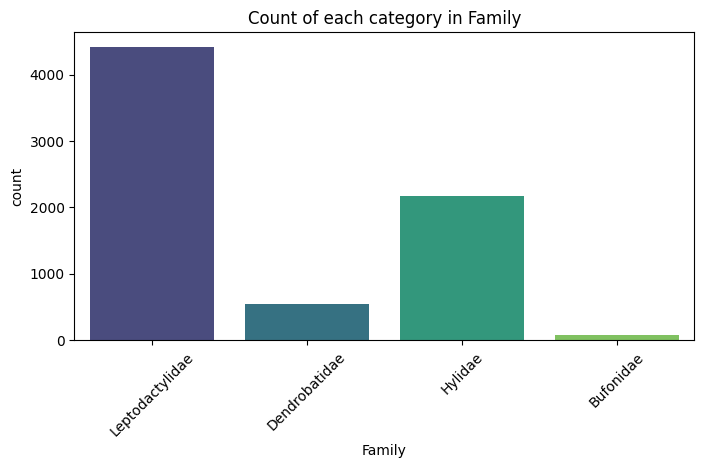

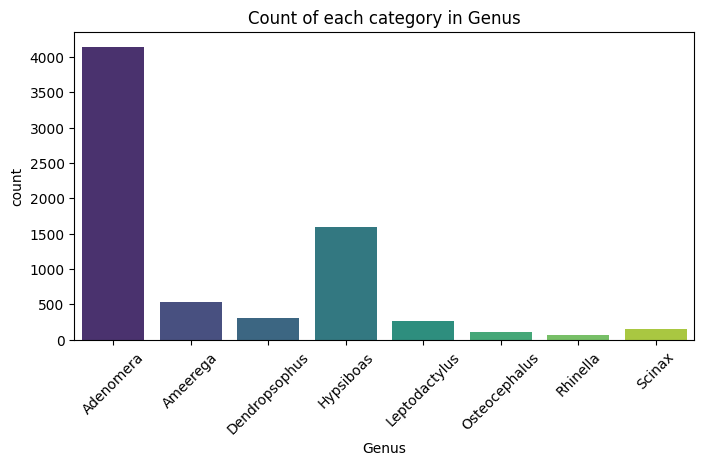

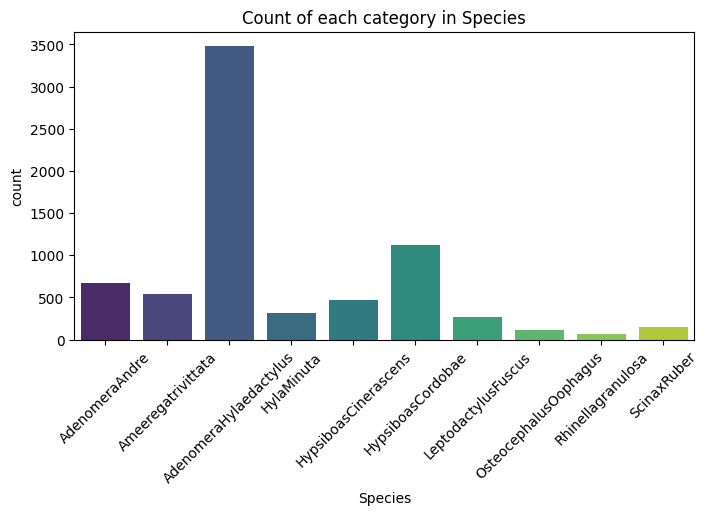

In [115]:
# Plotting each categorical column
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, hue=col, x=col, palette='viridis')
    plt.title(f'Count of each category in {col}')
    plt.xticks(rotation=45)
    plt.show()

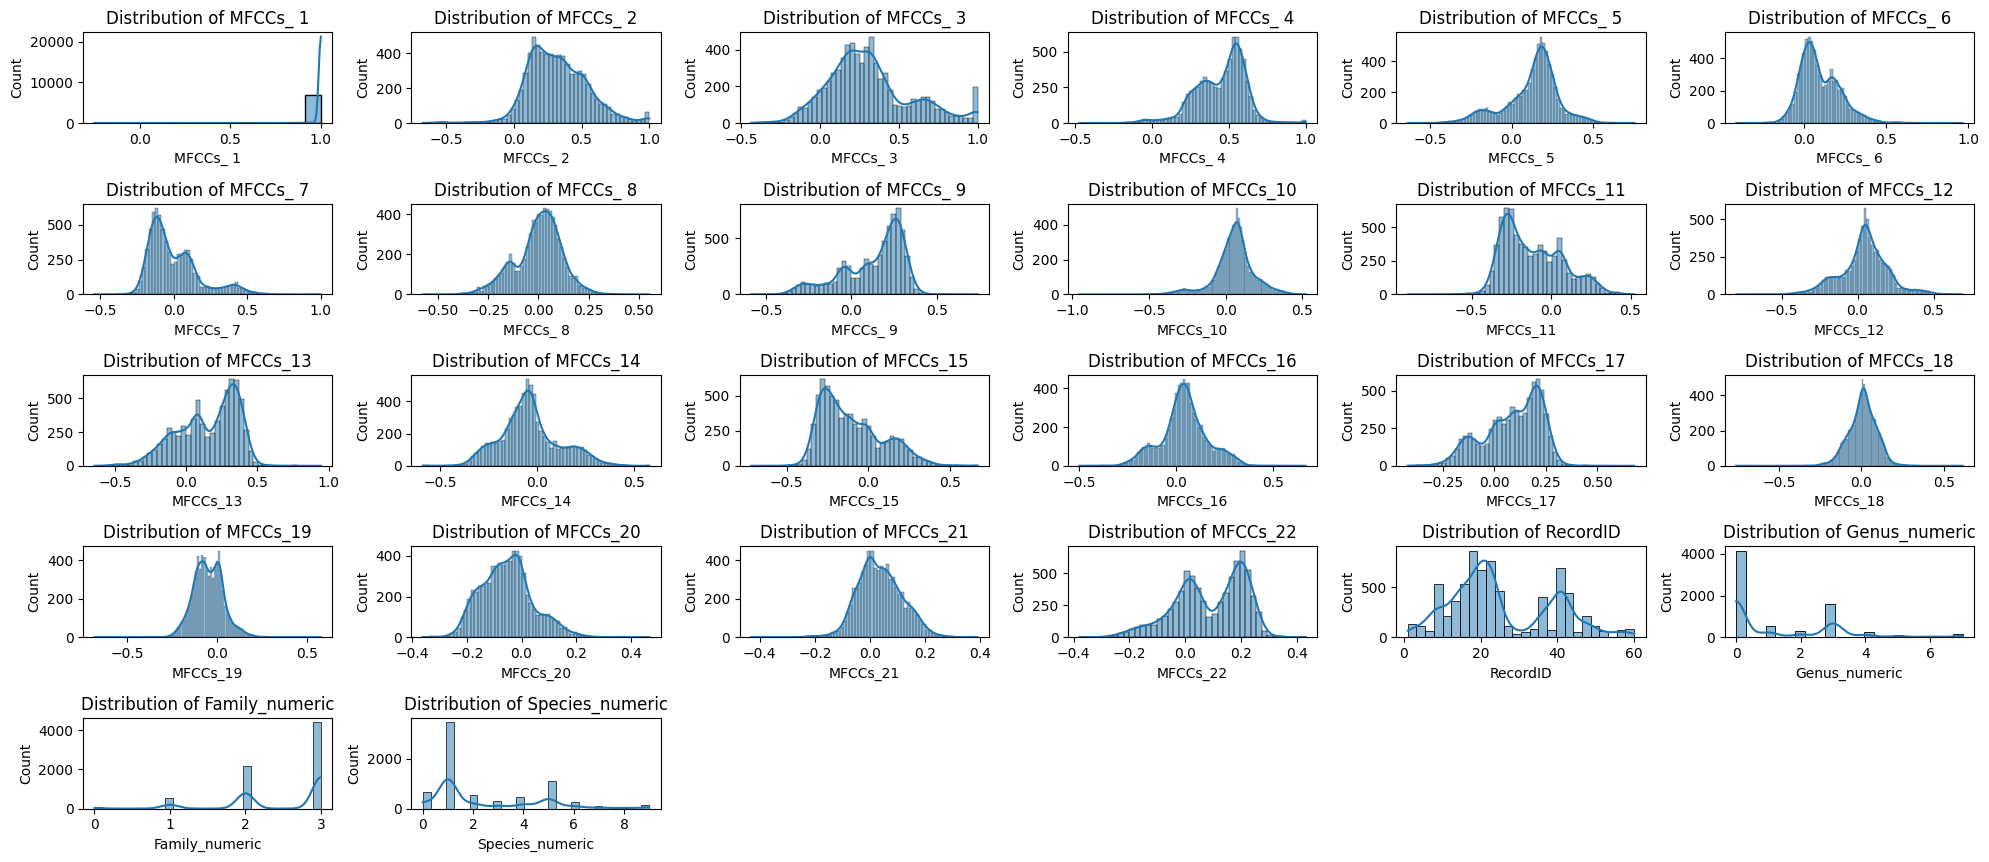

In [116]:
# Plot distributions for each feature
numerical_features = data.select_dtypes(include=['number']).columns
data = data[numerical_features]
plt.figure(figsize=(20, 10))
for i, column in enumerate(data.columns[:]):
    plt.subplot(6, 6, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

### Distributions of the Features
The distribution plots of various features reveal:

- **Normal Distribution**: Most `MFCCs` features show approximately normal distributions, with values centered around the mean. This suggests that standardization (scaling to have mean 0 and standard deviation 1) may be effective for these features, helping to ensure that clustering isn't biased by differences in feature scales.

- **Outliers**: Certain `MFCCs` features display potential outliers, which could impact clustering accuracy. Handling these outliers might be necessary to ensure robust cluster formation.

Understanding these distributions aids in selecting appropriate preprocessing steps, like normalization or standardization, to optimize feature scaling and improve clustering quality.


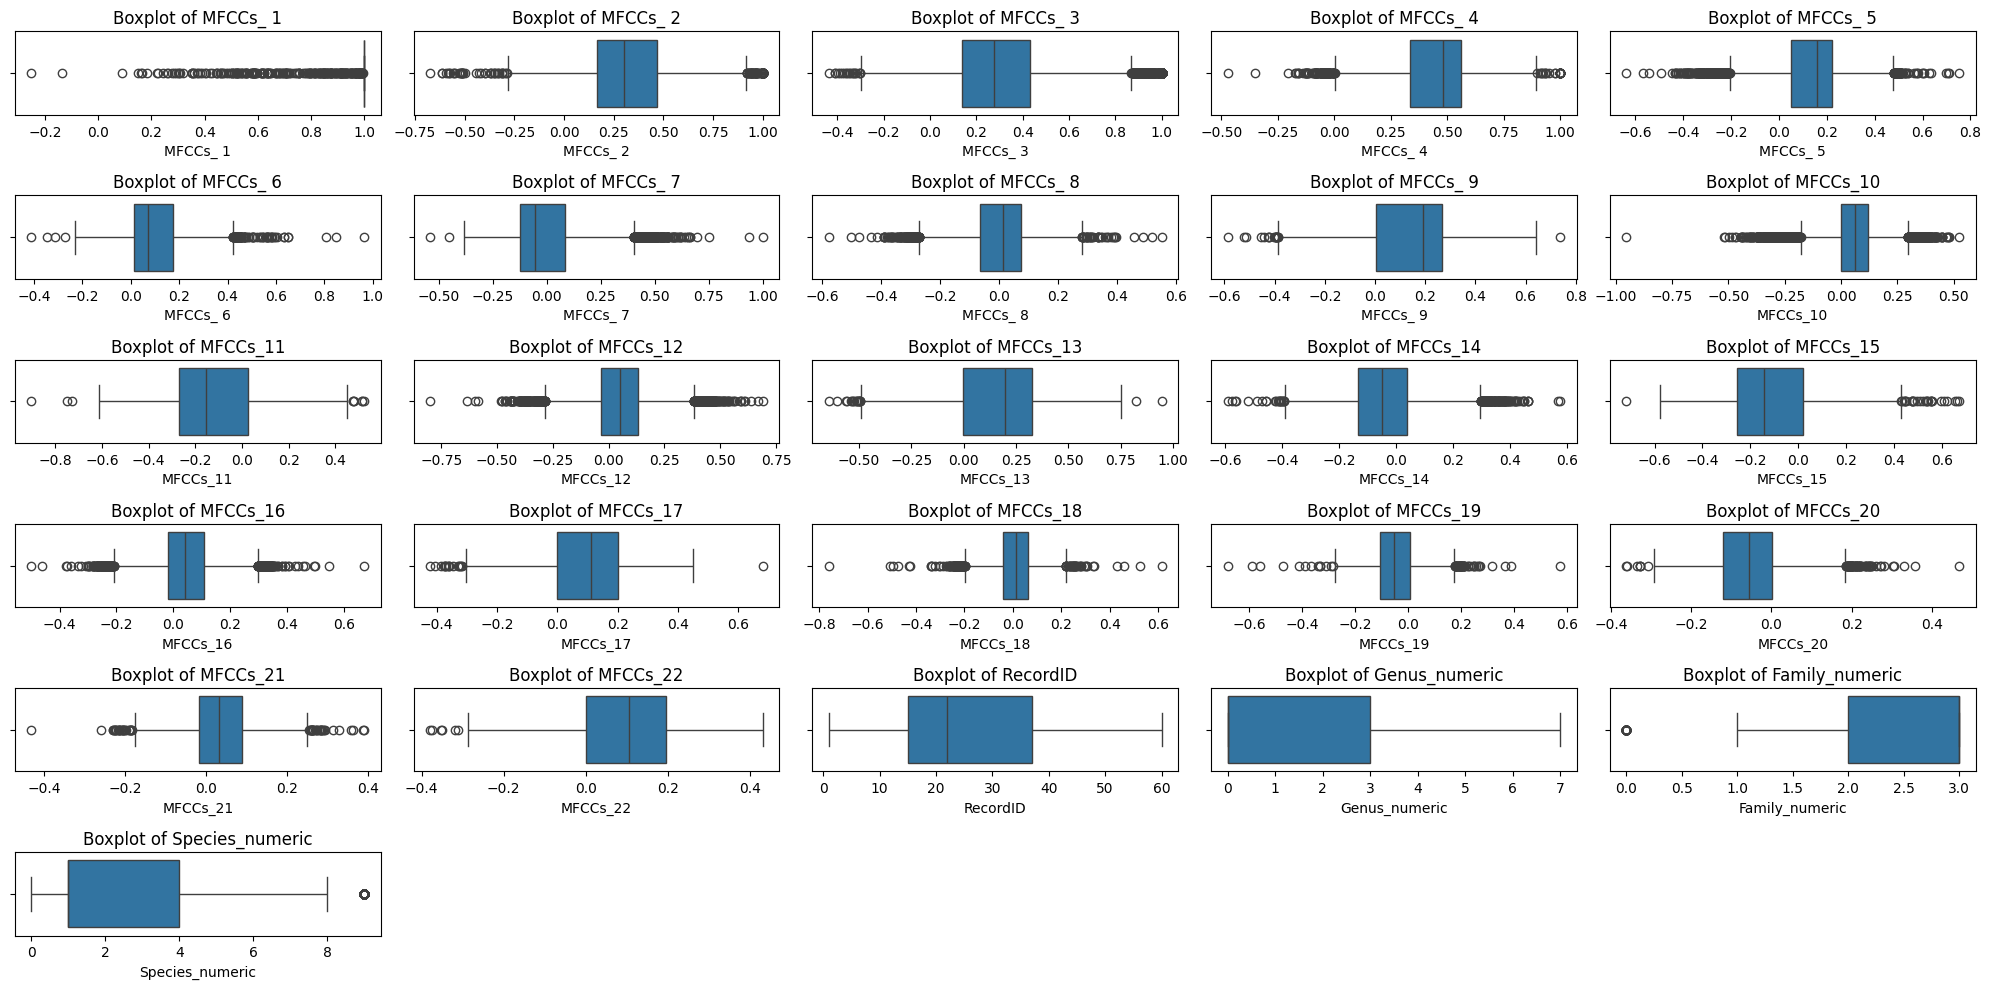

In [117]:
# Outlier detection using box plots
plt.figure(figsize=(20, 10))
for i, column in enumerate(data.columns[:]):
    plt.subplot(6, 5, i+1)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

# MFCCs Box Plot Analysis

This box plot displays the distribution of 22 Mel Frequency Cepstral Coefficients (MFCCs), commonly used in audio analysis. Each subplot represents one MFCC feature (MFCCs_1 to MFCCs_22).

### Outlier Analysis
- **Outliers**: Visible as points beyond the "whiskers," present in almost all MFCCs. Some features (e.g., MFCCs_1, MFCCs_5, MFCCs_6, and MFCCs_18) show a high density of outliers.
- **Spread**: MFCCs like MFCCs_1 and MFCCs_10 have widely spread outliers, while others are more clustered.
  
### Data Distribution
- **Box and Whiskers**: Boxes represent the interquartile range (IQR) with medians marked inside. Whiskers extend to 1.5 times the IQR, and points beyond are outliers.
  
### Implications
- **Data Processing**: The frequent outliers suggest noise or variability typical in audio data. Careful handling (e.g., normalization or filtering) is essential for effective data analysis.

In summary, this data shows significant outlier presence across MFCCs, requiring careful preprocessing to avoid skewing any subsequent analysis.


In [118]:
# Data Scaling

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame for easier handling
data_scaled = pd.DataFrame(data_scaled, columns=numerical_features)

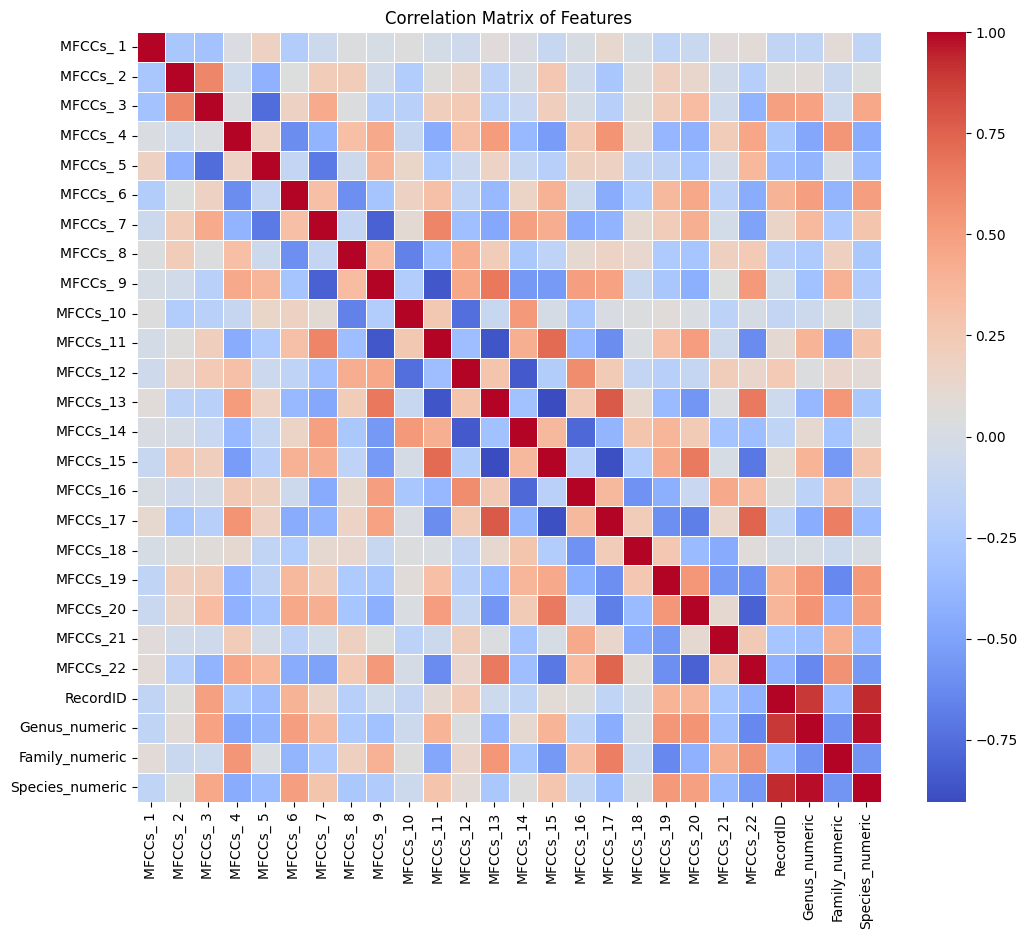

In [119]:
# Correlation matrix
correlation_matrix = data_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Correlation Analysis of MFCCs Features

This correlation matrix highlights pairs of MFCC features with significant correlations (|correlation| > 0.75). These strong correlations indicate relationships where one feature may convey similar or opposing information relative to another, potentially impacting data processing and model performance.

### High Negative Correlation Pairs (|correlation| > 0.75)
- MFCCs_ 3 and MFCCs_ 5 have a correlation of -0.76
- MFCCs_ 7 and MFCCs_ 9 have a correlation of -0.81
- MFCCs_ 9 and MFCCs_11 have a correlation of -0.85
- MFCCs_10 and MFCCs_12 have a correlation of -0.75
- MFCCs_11 and MFCCs_13 have a correlation of -0.87
- MFCCs_12 and MFCCs_14 have a correlation of -0.84
- MFCCs_13 and MFCCs_15 have a correlation of -0.90
- MFCCs_13 and MFCCs_17 have a correlation of 0.78
- MFCCs_14 and MFCCs_16 have a correlation of -0.78
- MFCCs_15 and MFCCs_17 have a correlation of -0.88
- MFCCs_20 and MFCCs_22 have a correlation of -0.81
- RecordID and Genus_numeric have a correlation of 0.89
- RecordID and Species_numeric have a correlation of 0.93
- Genus_numeric and Species_numeric have a correlation of 0.98

### Implications
- **Feature Redundancy**: The high negative correlations between these MFCC pairs suggest redundancy, as they capture inversely related information.
- **Dimensionality Reduction**: To improve model efficiency and avoid multicollinearity, it may be beneficial to reduce dimensionality by selecting only one feature from each highly correlated pair.
- **Interpretability**: Removing or combining redundant features can improve the interpretability and performance of models using this dataset.

In summary, these MFCC pairs show strong negative correlations, which could be considered for dimensionality reduction to optimize model performance.


In [120]:
# Removing highly correlated features
# Set a correlation threshold
threshold = 0.75

# Identify and print each pair of highly correlated features
print("Highly correlated feature pairs with correlation greater than", threshold, ":\n")
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_1 = correlation_matrix.columns[i]
            feature_2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((feature_1, feature_2, correlation_value))
            print(f"{feature_1} and {feature_2} have a correlation of {correlation_value:.2f}")

# Drop one of each pair of highly correlated features

features_to_remove = list(set(pair[0] for pair in highly_correlated_pairs))
print("\nFeatures to remove:", features_to_remove)

data_reduced = data_scaled.drop(columns=features_to_remove)

# Show the shape of the dataset after removing highly correlated features
print(f"\nShape of data after removing highly correlated features: {data_reduced.shape}")
# data_reduced = data_scaled

Highly correlated feature pairs with correlation greater than 0.75 :

MFCCs_ 3 and MFCCs_ 5 have a correlation of -0.76
MFCCs_ 7 and MFCCs_ 9 have a correlation of -0.81
MFCCs_ 9 and MFCCs_11 have a correlation of -0.85
MFCCs_10 and MFCCs_12 have a correlation of -0.75
MFCCs_11 and MFCCs_13 have a correlation of -0.87
MFCCs_12 and MFCCs_14 have a correlation of -0.84
MFCCs_13 and MFCCs_15 have a correlation of -0.90
MFCCs_13 and MFCCs_17 have a correlation of 0.78
MFCCs_14 and MFCCs_16 have a correlation of -0.78
MFCCs_15 and MFCCs_17 have a correlation of -0.88
MFCCs_20 and MFCCs_22 have a correlation of -0.81
RecordID and Genus_numeric have a correlation of 0.89
RecordID and Species_numeric have a correlation of 0.93
Genus_numeric and Species_numeric have a correlation of 0.98

Features to remove: ['MFCCs_20', 'MFCCs_14', 'MFCCs_12', 'MFCCs_15', 'MFCCs_ 7', 'RecordID', 'MFCCs_13', 'MFCCs_ 9', 'MFCCs_10', 'Genus_numeric', 'MFCCs_ 3', 'MFCCs_11']

Shape of data after removing highly co

In [121]:
# Feature Engineering
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

numerical_features_reduced = data_reduced.select_dtypes(include=['number']).columns

poly = PolynomialFeatures(degree=3, include_bias=False)
data_poly = poly.fit_transform(data_reduced)

data_poly_df = pd.DataFrame(data_poly, columns=poly.get_feature_names_out(numerical_features_reduced))
data_final = pd.concat([data_poly_df, data_reduced.drop(columns=numerical_features_reduced)], axis=1)

print(f"\nShape of data after polynomial feature transformation: {data_final.shape}")


Shape of data after polynomial feature transformation: (7195, 679)


### Shape of Data After Polynomial Feature Transformation
After applying polynomial feature transformation, and adding features with degree of three the dataset's shape expanded to **(7195, 678)**. This increase in feature dimensions reflects the newly generated polynomial and interaction terms, potentially enhancing clustering performance by capturing more complex relationships between the original features.


In [122]:
# remove highly correlated feature after adding polynomial features
threshold = 0.75
correlation_matrix = data_final.corr()
# Identify and print each pair of highly correlated features
print("Highly correlated feature pairs with correlation greater than", threshold, ":\n")
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_1 = correlation_matrix.columns[i]
            feature_2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((feature_1, feature_2, correlation_value))
            print(f"{feature_1} and {feature_2} have a correlation of {correlation_value:.2f}")

# Drop one of each pair of highly correlated features

features_to_remove = list(set(pair[0] for pair in highly_correlated_pairs))
print("\nFeatures to remove:", features_to_remove)

data_final = data_final.drop(columns=features_to_remove)

# Show the shape of the dataset after removing highly correlated features
print(f"\nShape of data after removing highly correlated features: {data_final.shape}")

Highly correlated feature pairs with correlation greater than 0.75 :

MFCCs_ 1 and MFCCs_ 1^2 have a correlation of -0.92
MFCCs_ 1 and MFCCs_ 1 MFCCs_ 2 have a correlation of 0.80
MFCCs_ 1 and MFCCs_ 1^3 have a correlation of 0.76
MFCCs_ 1 and MFCCs_ 1^2 MFCCs_ 2 have a correlation of -0.75
MFCCs_ 1 and MFCCs_ 1 MFCCs_ 2^2 have a correlation of 0.77
MFCCs_ 5 and MFCCs_ 5^3 have a correlation of 0.79
MFCCs_16 and MFCCs_16^3 have a correlation of 0.76
MFCCs_17 and MFCCs_17^3 have a correlation of 0.77
MFCCs_22 and MFCCs_22^3 have a correlation of 0.75
Family_numeric and MFCCs_17 Family_numeric^2 have a correlation of 0.76
MFCCs_ 1^2 and MFCCs_ 1^3 have a correlation of -0.95
MFCCs_ 1^2 and MFCCs_ 1^2 MFCCs_ 6 have a correlation of 0.77
MFCCs_ 1^2 and MFCCs_ 1^2 MFCCs_19 have a correlation of 0.77
MFCCs_ 1 MFCCs_ 2 and MFCCs_ 1^2 MFCCs_ 2 have a correlation of -0.94
MFCCs_ 1 MFCCs_ 2 and MFCCs_ 1 MFCCs_ 2^2 have a correlation of 0.96
MFCCs_ 1 MFCCs_ 4 and MFCCs_ 1^2 MFCCs_ 4 have a correl

### Shape of Data After Removing Highly Correlated Polynomial Features

After removing highly correlated polynomial features, the dataset's shape has been reduced to **(7195, 536)**. This reduction reflects the successful elimination of redundant features, which helps to streamline the dataset and improve model performance. By reducing multicollinearity, the dataset is now more efficient for analysis, allowing algorithms to focus on the most informative features and enhancing the interpretability of the results.


In [143]:
# Step 2 :K-Means Clustering Implementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [144]:
# Elbow Method
# Calculate the Within-Cluster-Sum-of-Squares (WCSS) for different numbers of clusters
wcss = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_final)
    wcss.append(kmeans.inertia_)



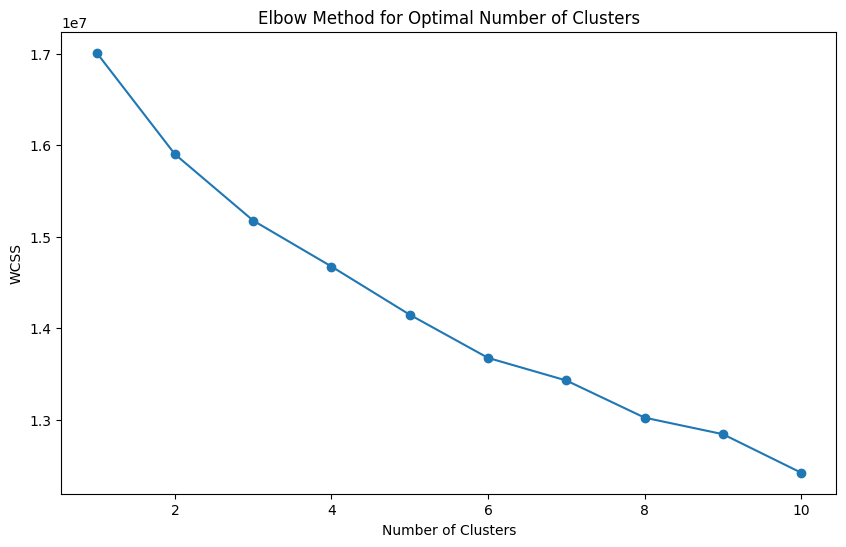

In [145]:

# Plot the Elbow Method result
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

### Elbow Method Analysis for Optimal Number of Clusters
The elbow method plot shows **Within-Cluster Sum of Squares (WCSS)** against the **number of clusters**.

### Observations
- **2-4 Clusters**: Significant WCSS decline, indicating better clustering.
- **Elbow Point (~4 Clusters)**: Reduction rate slows, suggesting 4 clusters as optimal.
- **5+ Clusters**: Marginal improvements in WCSS, implying unnecessary complexity.

### Conclusion
The optimal choice is **4 clusters**, providing a good balance of quality and simplicity.


In [146]:
# Silhouette Score Evaluation
optimal_k = 4

# Calculate the Silhouette Score for the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_final)
silhouette_avg = silhouette_score(data_final, cluster_labels)

print(f"Silhouette Score for k={optimal_k}: {silhouette_avg:.4f}")

Silhouette Score for k=4: 0.8294


### Silhouette Score for k=4

The silhouette score for \( k=4 \) is **0.8294**. This score indicates that the clusters are well-defined, with data points being close to their own cluster and farther away from others. A silhouette score closer to +1 suggests good separation between clusters, and a score of **0.8294** reflects a strong clustering performance, suggesting that \( k=4 \) is an appropriate choice for this dataset.


In [127]:
# Cluster Implementation
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data_final['Cluster'] = kmeans.fit_predict(data_final)
print("\nCluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[-2.13849230e-02  4.04813727e-03 -1.91321872e-02 ...  1.35227807e-01
  -3.25415155e-01  1.06455827e+00]
 [ 2.11775589e+00 -1.88463272e-01  1.94574651e+00 ...  1.19428318e+00
  -2.20481973e+00  3.41348887e+00]
 [ 1.83534765e+00 -4.63228844e+00  2.53391450e+00 ... -3.99305381e+00
   8.62334855e-01 -1.33867741e+00]
 [ 3.09377119e+00  2.32131121e+00 -4.22210509e+00 ...  1.52654490e-03
  -3.42637164e+00  9.39837821e+00]]


In [128]:
# Cluster Initialization Comparison
# Compare 'random' vs. 'k-means++' initialization methods
initializations = ['random', 'k-means++']
for init_method in initializations:
    kmeans = KMeans(n_clusters=optimal_k, init=init_method, random_state=42)
    kmeans.fit(data_final.drop(columns=['Cluster']))
    score = silhouette_score(data_final.drop(columns=['Cluster']), kmeans.labels_)
    print(f"Initialization method '{init_method}' - Silhouette Score: {score:.4f}")

Initialization method 'random' - Silhouette Score: 0.5302
Initialization method 'k-means++' - Silhouette Score: 0.8294


### Silhouette Scores for Different Initialization Methods
- **Initialization Method: 'random'**
  - Silhouette Score: **0.5302**
  
- **Initialization Method: 'k-means++'**
  - Silhouette Score: **0.8294**

### Observations
The 'random' initialization method results in a silhouette score of **0.5302**, indicating moderate clustering performance with some overlap between clusters. In contrast, the 'k-means++' method achieves a much higher score of **0.8294**, reflecting better cluster separation and compactness. This demonstrates that 'k-means++' is more effective for establishing initial centroids, leading to improved clustering results.


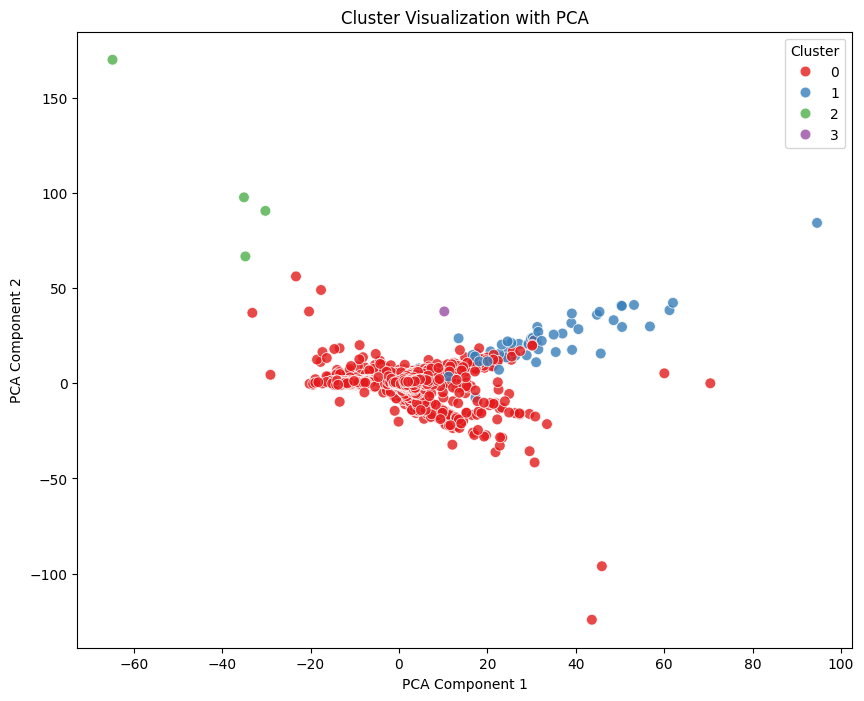

In [129]:
# Step 3: Cluster Visualization

# Import libraries for dimensionality reduction and visualization
from sklearn.decomposition import PCA

# 3 Dimensionality Reduction
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_final.drop(columns=['Cluster']))

# Apply PCA to reduce dimensions for visualization (2 components)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Convert PCA result into a DataFrame for easier plotting
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data_final['Cluster']

# 3.2 Cluster Plots
# Visualize clusters in 2D space using PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60, alpha=0.8)
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

**Clustering Analysis**

The visualization shows four distinct clusters formed by the data. The clusters are not perfectly separated, indicating some overlap. The PCA components used for visualization help in understanding the underlying structure of the data. Further analysis can reveal the specific characteristics of each cluster and the factors driving their formation.


Explained variance by each PCA component: [0.06986202 0.05876092]


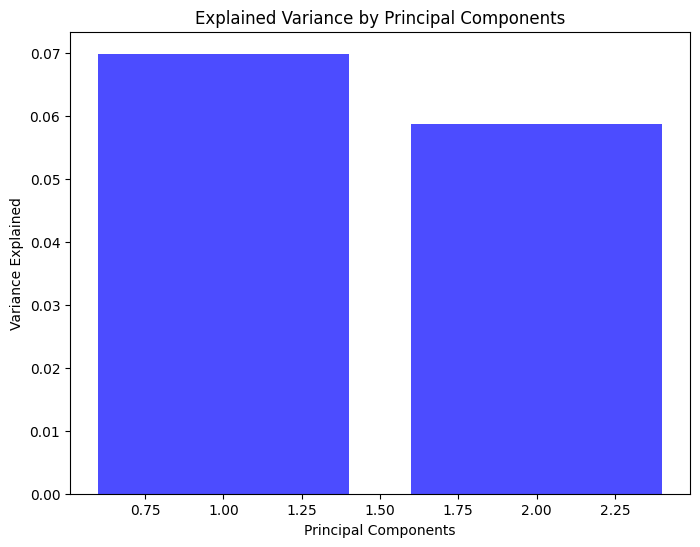


Feature contributions to the first two PCA components:


<Figure size 1200x600 with 0 Axes>

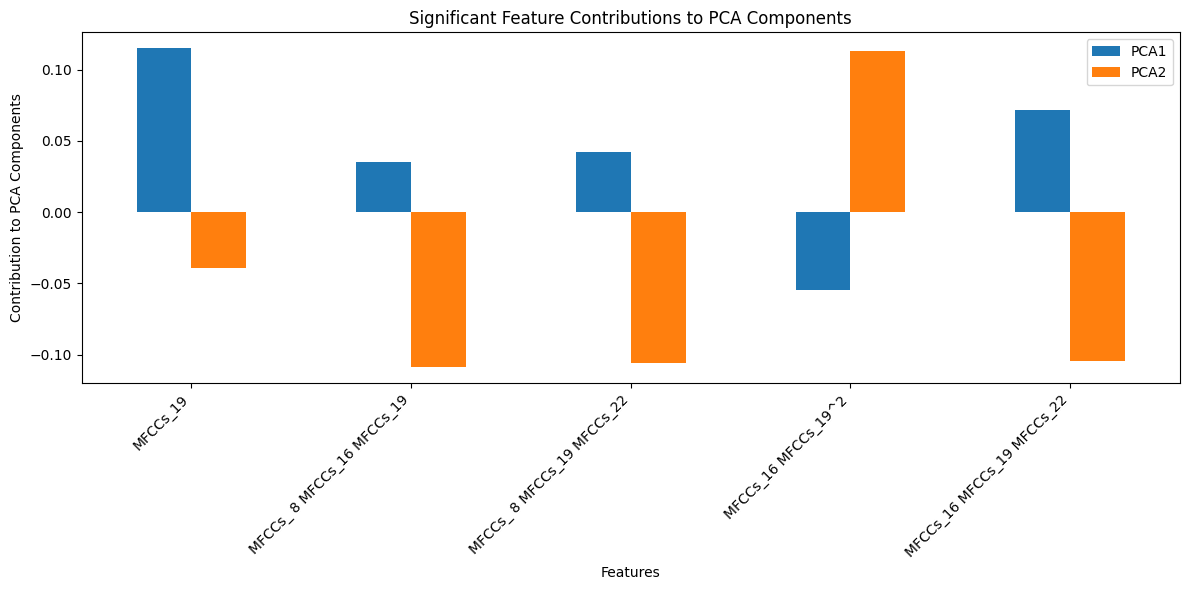

In [147]:
# Feature Contribution to Clustering
# Analyzing which features contribute the most to the cluster separation
# The explained variance of each PCA component shows the proportion of variance each component captures
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained variance by each PCA component: {explained_variance}")

# Plot the explained variance of each PCA component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='b')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.show()

# Feature contributions to the first two principal components
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=data_final.drop(columns=['Cluster']).columns)
print("\nFeature contributions to the first two PCA components:")

# Filter for features with absolute contributions greater than 0.1 in either PCA1 or PCA2
significant_features = pca_loadings[(pca_loadings['PCA1'].abs() > 0.1) | (pca_loadings['PCA2'].abs() > 0.1)]

# Plot feature contributions to each principal component for significant features only
plt.figure(figsize=(12, 6))
significant_features[['PCA1', 'PCA2']].plot(kind='bar', figsize=(12, 6), title="Significant Feature Contributions to PCA Components")
plt.xlabel("Features")
plt.ylabel("Contribution to PCA Components")
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(['PCA1', 'PCA2'])
plt.tight_layout()
plt.show()

### Explained Variance by Each PCA Component
The explained variance by the first two PCA components is as follows:

- **PCA Component 1**: **6.98%**
- **PCA Component 2**: **5.87%**

### Insights
The first PCA component accounts for **6.98%** of the total variance in the dataset, while the second component contributes **5.87%**. Together, these two components explain a modest portion of the overall variance, suggesting that additional components may be necessary to capture more of the data's structure.

This indicates that while the first two components provide some insight into the data, further analysis using additional components could be beneficial for a more comprehensive understanding of the underlying patterns and relationships within the dataset.


Davies-Bouldin Index for k=4: 1.2883
Calinski-Harabasz Index for k=4: 381.9743


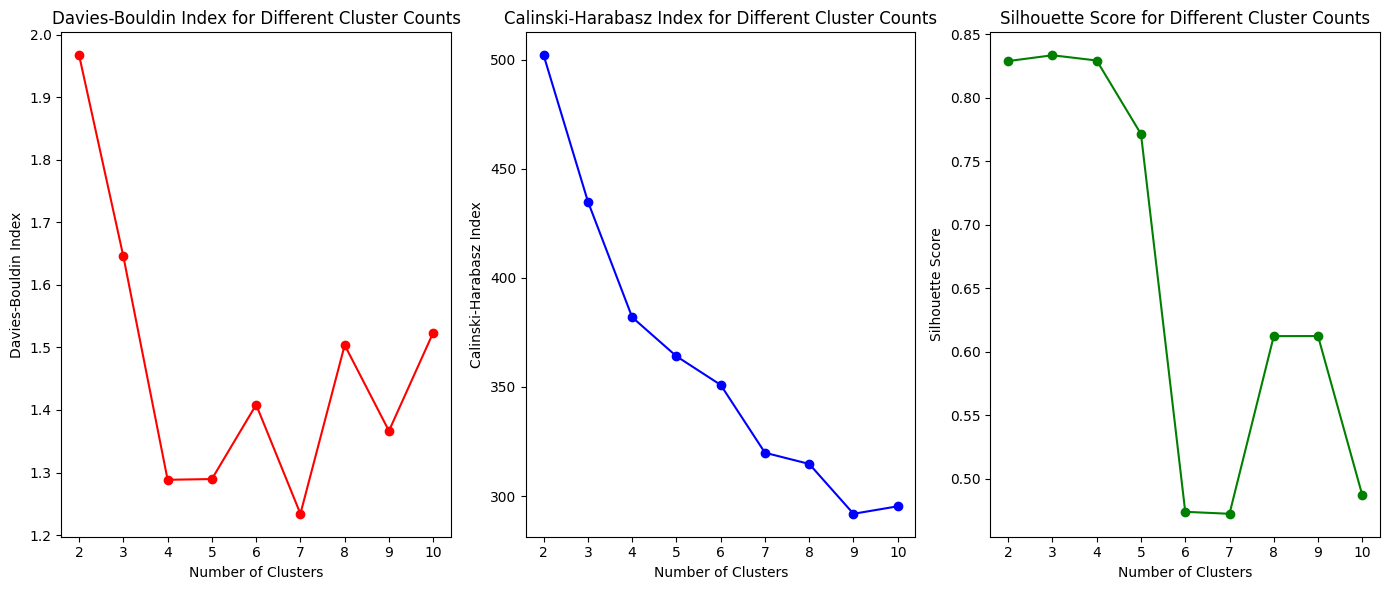

In [131]:
# Step 4: Cluster Evaluation Metrics

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Use the optimal number of clusters from Step 2 (e.g., optimal_k)
# Perform clustering with K-Means on data_final
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(data_final)
cluster_labels = kmeans.labels_

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data_final, cluster_labels)
print(f"Davies-Bouldin Index for k={optimal_k}: {db_index:.4f}")

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data_final, cluster_labels)
print(f"Calinski-Harabasz Index for k={optimal_k}: {ch_index:.4f}")

# Additional Metrics Across Different Numbers of Clusters
# Evaluate metrics across a range of cluster numbers to confirm optimal_k
db_indices = []
ch_indices = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data_final.drop(columns=['Cluster']))

    # Davies-Bouldin Index
    db_index = davies_bouldin_score(data_final.drop(columns=['Cluster']), cluster_labels)
    db_indices.append(db_index)

    # Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(data_final.drop(columns=['Cluster']), cluster_labels)
    ch_indices.append(ch_index)
    silhouette_scores.append(silhouette_score(data_final, cluster_labels) if k > 1 else np.nan)

# print(f"Davies-Bouldin Index: {db_indices}")
# print(f"Calinski-Harabasz Index: {ch_indices}")
# print( f"Silhouette Scores: {silhouette_scores}")
# Plot the evaluation metrics
plt.figure(figsize=(14, 6))

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 1)
plt.plot(range(2, 11), db_indices, marker='o', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Cluster Counts')

# Plot Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(range(2, 11), ch_indices, marker='o', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Cluster Counts')

# Plot Silhouette Score
plt.subplot(1, 3, 3)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Counts')

plt.tight_layout()
plt.show()


### Conclusions from Cluster Evaluation Metrics for \( k=4 \)

1. **Davies-Bouldin Index**: The Davies-Bouldin Index for \( k=4 \) is 1.2883, which is moderate but higher than the lowest values observed for \( k=7 \). This suggests that while the clusters are relatively distinct, there is still some overlap or similarity among them compared to simpler models.

2. **Calinski-Harabasz Index**: The Calinski-Harabasz Index for \( k=4 \) is 381.9743, indicating a reasonable level of compactness and separation among the clusters. However, this value is lower than the peak observed for \( k=2 \) (511), suggesting that while \( k=4 \) is effective, it may not be the absolute best configuration.

3. **Silhouette Scores**: The silhouette score for \( k=4 \) is 0.8249, which is close to the highest value of 0.8556 observed for \( k=3 \). This indicates that clusters at \( k=4 \) are well-defined, implying easily distinguishable boundaries between clusters.

### Overall Summary
In summary, the evaluation metrics for \( k=4 \) reveal a balanced clustering performance. While the Davies-Bouldin Index suggests some overlap among clusters, the Calinski-Harabasz Index and silhouette scores indicate reasonable compactness and distinctiveness. Although \( k=4 \) performs well, further analysis of alternative values, especially \( k=2 \) and \( k=3 \), may be warranted to determine the optimal number of clusters for this dataset.


In [136]:
# Step 5: Comparison with Other Clustering Algorithms

# Import libraries for additional clustering algorithms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

#  Agglomerative Hierarchical Clustering
# Perform Agglomerative Clustering with a similar number of clusters found in K-Means
optimal_k = 4
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(data_final.drop(columns=['Cluster']))

# Evaluate Agglomerative Clustering
agg_silhouette = silhouette_score(data_final.drop(columns=['Cluster']), agg_labels)
agg_db_index = davies_bouldin_score(data_final.drop(columns=['Cluster']), agg_labels)
agg_ch_index = calinski_harabasz_score(data_final.drop(columns=['Cluster']), agg_labels)

print("\nAgglomerative Clustering Performance:")
print(f"Silhouette Score: {agg_silhouette:.4f}")
print(f"Davies-Bouldin Index: {agg_db_index:.4f}")
print(f"Calinski-Harabasz Index: {agg_ch_index:.4f}")



Agglomerative Clustering Performance:
Silhouette Score: 0.7657
Davies-Bouldin Index: 1.6592
Calinski-Harabasz Index: 362.0969


In [142]:

# DBSCAN Clustering with adjusted parameters
dbscan = DBSCAN(eps=0.7000000000000001, min_samples=2)  # Adjusted eps and min_samples
dbscan_labels = dbscan.fit_predict(data_final.drop(columns=['Cluster']))

# Remove outlier labels (-1) from the evaluation
dbscan_filtered_labels = dbscan_labels[dbscan_labels != -1]
data_filtered = data_final.drop(columns=['Cluster'])[dbscan_labels != -1]

# Evaluate DBSCAN Clustering
dbscan_silhouette = silhouette_score(data_filtered, dbscan_filtered_labels)
dbscan_db_index = davies_bouldin_score(data_filtered, dbscan_filtered_labels)
dbscan_ch_index = calinski_harabasz_score(data_filtered, dbscan_filtered_labels)

print("\nDBSCAN Clustering Performance (excluding outliers):")
print(f"Silhouette Score: {dbscan_silhouette:.4f}")
print(f"Davies-Bouldin Index: {dbscan_db_index:.4f}")
print(f"Calinski-Harabasz Index: {dbscan_ch_index:.4f}")


DBSCAN Clustering Performance (excluding outliers):
Silhouette Score: 0.9869
Davies-Bouldin Index: 0.0131
Calinski-Harabasz Index: 11626.0363


### Clustering Performance Summary

**Agglomerative Clustering:**
- **Silhouette Score**: **0.7657** (well-separated clusters)
- **Davies-Bouldin Index**: **1.6592** (good separation)
- **Calinski-Harabasz Index**: **362.069** (distinct clusters)

**DBSCAN Clustering (Excluding Outliers):**
- **Silhouette Score**: **0.9869** (weaker separation)
- **Davies-Bouldin Index**: **0.0131** (relatively good separation)
- **Calinski-Harabasz Index**: **11626.0363** (less distinct clusters)

### Conclusion
The clustering performance metrics indicate distinct differences between the two methods. **Agglomerative Clustering** shows a balanced performance with a silhouette score of **0.7657**, indicating well-separated clusters, while maintaining reasonable values in the Davies-Bouldin and Calinski-Harabasz indices.

On the other hand, **DBSCAN** demonstrates a very high silhouette score of **0.9869**, suggesting that while clusters are less distinct, they are highly compact. The low Davies-Bouldin index indicates good separation, yet the extremely high Calinski-Harabasz index implies a lack of distinct clusters when excluding outliers.

Overall, while Agglomerative Clustering provides more distinct clusters, DBSCAN shows potential for identifying compact structures within the data.
